# Scipy's SLSQP on regression tests

Using scipy, run Process's regression tests.

In [1]:
# Reload Process each time (keep editable install up-to-date)
%load_ext autoreload
%autoreload 2

from process.io import plot_solutions as ps

## Single regression run

Run a single regression run using scipy's SLSQP. Check the values of the constraints.

```
FTOL_REL = 1e-6
CONSTR_TOL = 1e-8
```

In [2]:
results_df = ps.run_and_print("baseline_jan_2017", "scipy", rerun=False)

Scenario = baseline_jan_2017
Solver = scipy
Objective function = 1.8922
Constraint residuals = 5.196e-07
Constraints above tolerance: 6
Constraint residuals =
normres001   -9.820600e-09
normres002    9.559300e-09
normres003   -1.000000e-08
normres004    8.388100e-09
normres005    1.000000e-08
normres006   -5.167200e-07
normres007    1.426300e-08
normres008    3.507100e-08
normres009    1.020200e-08
normres010   -9.959100e-09
normres011   -9.961100e-09
normres012   -1.000000e-08
normres013   -1.000700e-08
normres014    9.993600e-09
normres015    9.996100e-09
normres016    9.999900e-09
normres017   -1.000000e-08
normres018   -1.389600e-08
Name: 0, dtype: float64


Scipy appears to work, but some of the constraints are slightly violated. Have the latest scipy (1.10.1), so this should be fixed! Is it to do with re-evaluating the models at the optimum x to get the constraint values again (non-idempotence)? No, the constraints are never completely satisfied.

More likely to do with only checking linearised constraints.

## Running subset of reg tests

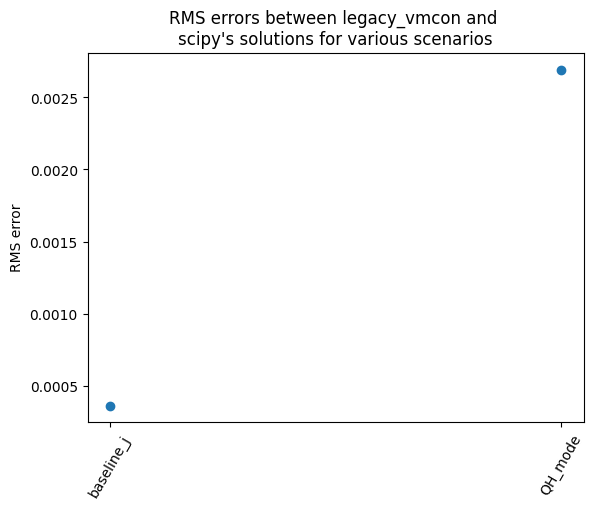

In [3]:
results_df = ps.compare_solvers_regression_tests(["legacy_vmcon", "scipy"], scenarios=["baseline_jan_2017", "ITER", "L_mode", "Hybrid_mode", "QH_mode"], rerun_tests=False)

In [4]:
results_df[["tag", "sqsumsq"]]

,tag,sqsumsq
0,baseline_jan_2017_legacy_vmcon,2.085200e-10
1,ITER_legacy_vmcon,3.668900e-11
2,L_mode_legacy_vmcon,2.249300e-09
3,Hybrid_mode_legacy_vmcon,6.136600e-09
4,QH_mode_legacy_vmcon,9.473400e-09
5,baseline_jan_2017_scipy,5.196000e-07
6,ITER_scipy,NaN
7,L_mode_scipy,NaN
8,Hybrid_mode_scipy,NaN
9,QH_mode_scipy,2.069400e-07


3 of the 5 fail to converge. Investigate.

## Full regression

process.io.plot_solutions - WARNING - scipy running L_mode threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running Menard_HTS-PP threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running vacuum_model threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running FNSF threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running ITER threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running CFETR_small threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running hts_REBCO threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running G-L_Nb-Ti threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running Hybrid_mode threw exception: no mfile data. Not plotting


Text(0.5, 1.0, "RMS errors between VMCON and scipy's SLSQP, converged\nand non-converged")

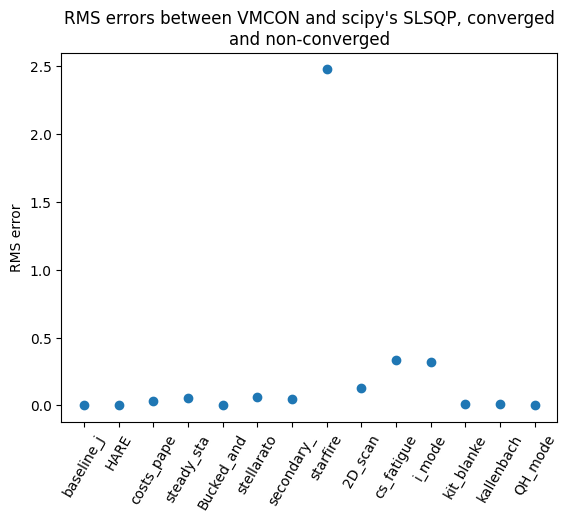

In [12]:
results_df, ax = ps.compare_solvers_regression_tests(["legacy_vmcon", "scipy"], rerun_tests=False)
ax.set_title("RMS errors between VMCON and scipy's SLSQP, converged\nand non-converged")

process.io.plot_solutions - WARNING - scipy running L_mode threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running Menard_HTS-PP threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running vacuum_model threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running FNSF threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running ITER threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running CFETR_small threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running hts_REBCO threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running G-L_Nb-Ti threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - scipy running Hybrid_mode threw exception: no mfile data. Not plotting
process.io.plot_solutions - WARNING - D

Text(0.5, 1.0, "RMS errors between VMCON and scipy's SLSQP, converged solutions only")

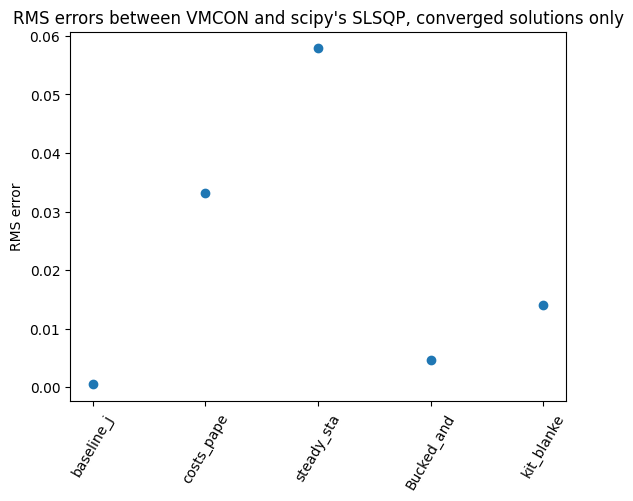

In [16]:
# Re-run with non-converged results removed (plot_solutions modification)
results_df, ax = ps.compare_solvers_regression_tests(["legacy_vmcon", "scipy"], rerun_tests=False)
ax.set_title("RMS errors between VMCON and scipy's SLSQP, converged solutions only")

In [17]:
results_df[["tag", "sqsumsq", "ifail"]]

,tag,sqsumsq,ifail
0,L_mode_legacy_vmcon,2.249300e-09,1.0
1,Menard_HTS-PP_legacy_vmcon,6.682700e-08,1.0
2,vacuum_model_legacy_vmcon,3.844900e-05,1.0
3,FNSF_legacy_vmcon,5.516300e-08,1.0
4,ITER_legacy_vmcon,3.668900e-11,1.0
5,CFETR_small_legacy_vmcon,5.274700e-10,1.0
6,baseline_jan_2017_legacy_vmcon,2.085200e-10,1.0
7,hts_REBCO_legacy_vmcon,5.420200e-06,1.0
8,HARE_legacy_vmcon,3.036800e-10,1.0
9,costs_paper_legacy_vmcon,7.705600e-05,1.0


Check stats on exit codes using scipy's SLSQP:

In [15]:
results_df[results_df["solver"] == "scipy"]["ifail"].value_counts(dropna=False)

ifail
NaN    9
2.0    7
5.0    6
1.0    1
Name: count, dtype: int64

9 throw exceptions whilst solving, 6 hit iteration limit, 6 hit some other solver error, 2 converge.

## Why do so many fail?

And... why does starfire converge, when the constraint residuals are so high?

### ifail == NaN

Check L_mode. Probably hit an exception? Got a kernel crash.

In [2]:
results_df = ps.run_and_print("L_mode", "scipy", rerun=True)

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-913-g759a689f1 code contains untracked changes
    Branch : 1813-implement-nlopt-s-slsqp-solver
 Warning in routine OCMMNT :
  Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
This is longer than 110 columns.
   Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
 Da

/home/jon/code/process/process/physics_functions.py:427: RuntimeWarning: divide by zero encountered in divide
  xi = ((reactionconstants.bg**2) / (4.0 * theta)) ** 0.3333333333
/home/jon/code/process/process/physics_functions.py:431: RuntimeWarning: invalid value encountered in multiply
  1.0e-6
/home/jon/code/process/process/impurity_radiation.py:383: RuntimeWarning: divide by zero encountered in log
  zav_of_te = yi + c * (numpy.log(tprofile) - xi)
/home/jon/code/process/process/impurity_radiation.py:441: RuntimeWarning: divide by zero encountered in log
  pimpden = numpy.exp(yi + c * (numpy.log(tprofile) - xi))
/home/jon/code/process/process/physics_functions.py:427: RuntimeWarning: divide by zero encountered in divide
  xi = ((reactionconstants.bg**2) / (4.0 * theta)) ** 0.3333333333
/home/jon/code/process/process/physics_functions.py:431: RuntimeWarning: invalid value encountered in multiply
  1.0e-6
/home/jon/code/process/process/impurity_radiation.py:383: RuntimeWarning: divide 

Evaluation 1, objective function = 3.5078, constraint residuals = 1.025e+00
Evaluation 2, objective function = 3.5078, constraint residuals = 1.025e+00
Evaluation 3, objective function = 3.5078, constraint residuals = 1.016e+00
Evaluation 4, objective function = 3.5113, constraint residuals = 1.016e+00
Evaluation 5, objective function = 3.5078, constraint residuals = 1.025e+00
Evaluation 6, objective function = 3.5078, constraint residuals = 1.025e+00
Evaluation 7, objective function = 3.5078, constraint residuals = 1.025e+00
Evaluation 8, objective function = 3.5078, constraint residuals = 1.025e+00
Evaluation 9, objective function = 3.5078, constraint residuals = 1.025e+00
Evaluation 10, objective function = 3.5078, constraint residuals = 1.033e+00
Evaluation 11, objective function = 3.5078, constraint residuals = 1.025e+00
Evaluation 12, objective function = 3.5078, constraint residuals = 1.026e+00
Evaluation 13, objective function = 3.5078, constraint residuals = 1.025e+00
Evaluati

/home/jon/.local/lib/python3.10/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Evaluation 819, objective function = 2.7678, constraint residuals = 2.320e+00
Evaluation 820, objective function = 2.7972, constraint residuals = 4.334e-01
Evaluation 821, objective function = 2.8015, constraint residuals = 5.079e-02
Evaluation 822, objective function = 2.802, constraint residuals = 6.001e-02
Evaluation 823, objective function = 2.8021, constraint residuals = 6.473e-02
Evaluation 824, objective function = 2.8021, constraint residuals = 6.668e-02
Evaluation 825, objective function = 2.8021, constraint residuals = 6.740e-02
Evaluation 826, objective function = 2.8021, constraint residuals = 1.116e-01
Evaluation 827, objective function = 2.8021, constraint residuals = 1.813e-01
Evaluation 828, objective function = 2.8372, constraint residuals = 2.197e-01
Evaluation 829, objective function = 2.8021, constraint residuals = 9.775e-02
Evaluation 830, objective function = 2.8021, constraint residuals = 6.823e-02
Evaluation 831, objective function = 2.8021, constraint residuals

process.build - ERROR - base is <= 1e-6. Kludging to 1e-6.
Traceback (most recent call last):
  File "/home/jon/code/process/process/build.py", line 947, in ripple_amplitude
    assert base > 1e-6
AssertionError
process.build - ERROR - base is <= 1e-6. Kludging to 1e-6.
Traceback (most recent call last):
  File "/home/jon/code/process/process/build.py", line 947, in ripple_amplitude
    assert base > 1e-6
AssertionError


: 

: 

Get a kernel crash again when running.

In [2]:
results_df = ps.run_and_print("vacuum_model", "scipy", rerun=True)

The IN.DAT file does not contain any obsolete variables.
 The total number of constraints is counted automatically and does not need to be stated in IN.DAT.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-913-g759a689f1 code contains untracked changes
    Branch : 1813-implement-nlopt-s-slsqp-solver
 Warning in routine OCMMNT :
  Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
This is longer than 110 columns.
   Git log : Overwrite regre

: 

: 

Getting a kernel crash here too. From running pytest, this looks like a `STOP 1` is being hit due to a NaN in the objective function calculation. It's likely that similar `STOP 1`s are the reason for the other NaN failures.

### ifail == 2

Iteration limit reached: the solver couldn't find a solution in a sensible number of iterations.

### ifail == 5

Some other error. Check starfire.

In [3]:
results_df = ps.run_and_print("starfire", "scipy", rerun=True)

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-913-g759a689f1 code contains untracked changes
    Branch : 1813-implement-nlopt-s-slsqp-solver
 Warning in routine OCMMNT :
  Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
This is longer than 110 columns.
   Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
 Da

/home/jon/code/process/process/physics_functions.py:427: RuntimeWarning: divide by zero encountered in divide
  xi = ((reactionconstants.bg**2) / (4.0 * theta)) ** 0.3333333333
/home/jon/code/process/process/physics_functions.py:431: RuntimeWarning: invalid value encountered in multiply
  1.0e-6
/home/jon/code/process/process/impurity_radiation.py:383: RuntimeWarning: divide by zero encountered in log
  zav_of_te = yi + c * (numpy.log(tprofile) - xi)
/home/jon/code/process/process/impurity_radiation.py:441: RuntimeWarning: divide by zero encountered in log
  pimpden = numpy.exp(yi + c * (numpy.log(tprofile) - xi))
/home/jon/code/process/process/physics_functions.py:427: RuntimeWarning: divide by zero encountered in divide
  xi = ((reactionconstants.bg**2) / (4.0 * theta)) ** 0.3333333333
/home/jon/code/process/process/physics_functions.py:431: RuntimeWarning: invalid value encountered in multiply
  1.0e-6
/home/jon/code/process/process/impurity_radiation.py:383: RuntimeWarning: divide 

Evaluation 1, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 2, objective function = -38.985, constraint residuals = 1.621e+00
Evaluation 3, objective function = -38.838, constraint residuals = 1.621e+00
Evaluation 4, objective function = -38.707, constraint residuals = 1.621e+00
Evaluation 5, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 6, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 7, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 8, objective function = -39.005, constraint residuals = 1.621e+00
Evaluation 9, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 10, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 11, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 12, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 13, objective function = -38.828, constraint residuals = 1.621

/home/jon/.local/lib/python3.10/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Evaluation 28, objective function = -38.491, constraint residuals = 4.626e+00
Evaluation 29, objective function = -38.63, constraint residuals = 4.626e+00
Evaluation 30, objective function = -38.5, constraint residuals = 4.626e+00
Evaluation 31, objective function = -38.608, constraint residuals = 4.626e+00
Evaluation 32, objective function = -38.49, constraint residuals = 4.626e+00
Evaluation 33, objective function = -38.49, constraint residuals = 4.626e+00
Evaluation 34, objective function = -38.49, constraint residuals = 4.627e+00
Evaluation 35, objective function = -38.661, constraint residuals = 4.626e+00
Evaluation 36, objective function = -38.49, constraint residuals = 4.626e+00
Evaluation 37, objective function = -38.49, constraint residuals = 4.629e+00
Evaluation 38, objective function = -38.49, constraint residuals = 4.626e+00
Evaluation 39, objective function = -38.49, constraint residuals = 4.626e+00
Evaluation 40, objective function = -38.49, constraint residuals = 4.626e+

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 1308401204.2216957
            iooic: -13.040173534243232
            jcritsc: -100336180.40326385
            Check conductor dimensions. fcond likely gone negative. fcond: 0.4456050762542364
            


Evaluation 55, objective function = -38.827, constraint residuals = 3.641e+00
Evaluation 56, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 57, objective function = -38.796, constraint residuals = 1.624e+00
Evaluation 58, objective function = -38.666, constraint residuals = 1.625e+00
Evaluation 59, objective function = -38.775, constraint residuals = 1.624e+00
Evaluation 60, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 61, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 62, objective function = -38.656, constraint residuals = 1.624e+00
Evaluation 63, objective function = -38.828, constraint residuals = 1.625e+00
Evaluation 64, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 65, objective function = -38.656, constraint residuals = 1.623e+00
Evaluation 66, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 67, objective function = -38.656, constraint residual

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 254242440322.87057
            iooic: -559.6789184280175
            jcritsc: -454264814.9709961
            Check conductor dimensions. fcond likely gone negative. fcond: 0.010000000000000009
            


Evaluation 56, objective function = -38.74, constraint residuals = 3.039e+02
Evaluation 57, objective function = -38.785, constraint residuals = 2.991e+00
Evaluation 58, objective function = -40.301, constraint residuals = 2.992e+00
Evaluation 59, objective function = -38.886, constraint residuals = 2.991e+00
Evaluation 60, objective function = -40.01, constraint residuals = 2.991e+00
Evaluation 61, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 62, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 63, objective function = -38.786, constraint residuals = 3.005e+00
Evaluation 64, objective function = -40.591, constraint residuals = 2.992e+00
Evaluation 65, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 66, objective function = -38.786, constraint residuals = 3.017e+00
Evaluation 67, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 68, objective function = -38.786, constraint residuals 

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -19

Evaluation 84, objective function = -38.713, constraint residuals = 7.350e+00
Evaluation 85, objective function = -40.316, constraint residuals = 7.351e+00
Evaluation 86, objective function = -38.814, constraint residuals = 7.350e+00
Evaluation 87, objective function = -37.533, constraint residuals = 7.351e+00
Evaluation 88, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 89, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 90, objective function = -38.714, constraint residuals = 7.262e+00
Evaluation 91, objective function = -40.536, constraint residuals = 7.351e+00
Evaluation 92, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 93, objective function = -38.714, constraint residuals = 7.241e+00
Evaluation 94, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 95, objective function = -38.714, constraint residuals = 7.332e+00
Evaluation 96, objective function = -38.714, constraint residual

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 76401964.72412778
            iooic: -0.3825826407093499
            jcritsc: -199700552.49362653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 84503333.94001935
            iooic: -0.42315232630241456
            jcritsc: -199699561.33391857
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968854260020312
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: 

Evaluation 104, objective function = -38.714, constraint residuals = 7.318e+00
Evaluation 105, objective function = -38.714, constraint residuals = 7.348e+00
Evaluation 106, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 107, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 108, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 109, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 110, objective function = -38.714, constraint residuals = 7.350e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85525174.88961385
            iooic: -0.43005302787664945
            jcritsc: -198871230.6291324
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968793133287008
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -1

Evaluation 111, objective function = -38.532, constraint residuals = 1.970e+00
Evaluation 112, objective function = -39.955, constraint residuals = 1.970e+00
Evaluation 113, objective function = -38.631, constraint residuals = 1.970e+00
Evaluation 114, objective function = -39.733, constraint residuals = 1.970e+00
Evaluation 115, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 116, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 117, objective function = -38.531, constraint residuals = 1.966e+00
Evaluation 118, objective function = -40.298, constraint residuals = 1.971e+00
Evaluation 119, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 120, objective function = -38.531, constraint residuals = 1.964e+00
Evaluation 121, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 122, objective function = -38.531, constraint residuals = 1.969e+00
Evaluation 123, objective function = -38.531, constr

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 103046947.56564777
            iooic: -0.6018904349864277
            jcritsc: -171205491.19204962
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6962434009360425
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 94515345.98324987
            iooic: -0.5520363131328024
            jcritsc: -171212189.73236725
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 104506834.55532964
            iooic: -0.6104039738588328
            jcritsc: -171209295.86133194
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961522014908765
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcrit

Evaluation 130, objective function = -38.531, constraint residuals = 1.983e+00
Evaluation 131, objective function = -38.531, constraint residuals = 2.023e+00
Evaluation 132, objective function = -38.531, constraint residuals = 1.978e+00
Evaluation 133, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 134, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 135, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 136, objective function = -38.531, constraint residuals = 1.969e+00
Evaluation 137, objective function = -38.531, constraint residuals = 1.970e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc: -171212861.5215288
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc: -171212861.5215288
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc: -171212861.5215288
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc

Evaluation 138, objective function = -38.423, constraint residuals = 1.923e+00
Evaluation 139, objective function = -40.017, constraint residuals = 1.923e+00
Evaluation 140, objective function = -38.524, constraint residuals = 1.923e+00
Evaluation 141, objective function = -37.255, constraint residuals = 1.923e+00
Evaluation 142, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 143, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 144, objective function = -38.424, constraint residuals = 1.922e+00
Evaluation 145, objective function = -40.224, constraint residuals = 1.924e+00
Evaluation 146, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 147, objective function = -38.424, constraint residuals = 1.920e+00
Evaluation 148, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 149, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 150, objective function = -38.424, constr

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcri

Evaluation 164, objective function = -38.424, constraint residuals = 1.923e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcri

Evaluation 165, objective function = -38.492, constraint residuals = 1.905e+00
Evaluation 166, objective function = -39.914, constraint residuals = 1.906e+00
Evaluation 167, objective function = -38.59, constraint residuals = 1.906e+00
Evaluation 168, objective function = -39.691, constraint residuals = 1.906e+00
Evaluation 169, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 170, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 171, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 172, objective function = -40.255, constraint residuals = 1.906e+00
Evaluation 173, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 174, objective function = -38.491, constraint residuals = 1.904e+00
Evaluation 175, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 176, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 177, objective function = -38.491, constra

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 104280848.56092045
            iooic: -0.6649225369802513
            jcritsc: -156831574.74931198
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 115287041.13232249
            iooic: -0.7351235504039536
            jcritsc: -156826755.26987505
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957576945125765
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcri

Evaluation 185, objective function = -38.491, constraint residuals = 1.916e+00
Evaluation 186, objective function = -38.491, constraint residuals = 1.911e+00
Evaluation 187, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 188, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 189, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 190, objective function = -38.491, constraint residuals = 1.904e+00
Evaluation 191, objective function = -38.491, constraint residuals = 1.905e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 113542600.97109602
            iooic: -0.7240312676274687
            jcritsc: -156820024.28314516
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6958630408600583
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 104280848.56092045
            iooic: -0.6649225369802513
            jcritsc: -156831574.74931198
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 115287041.13232249
            iooic: -0.7351235504039536
            jcritsc: -156826755.26987505
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957576945125765
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcri

Evaluation 192, objective function = -38.427, constraint residuals = 1.895e+00
Evaluation 193, objective function = -38.556, constraint residuals = 1.900e+00
Evaluation 194, objective function = -40.038, constraint residuals = 1.900e+00
Evaluation 195, objective function = -38.655, constraint residuals = 1.900e+00
Evaluation 196, objective function = -39.766, constraint residuals = 1.900e+00
Evaluation 197, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 198, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 199, objective function = -38.555, constraint residuals = 1.901e+00
Evaluation 200, objective function = -40.337, constraint residuals = 1.900e+00
Evaluation 201, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 202, objective function = -38.555, constraint residuals = 1.899e+00
Evaluation 203, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 204, objective function = -38.555, constr

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117868501.02169162
            iooic: -0.807044170605084
            jcritsc: -146049628.15519667
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957063921483946
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 114679355.83073427
            iooic: -0.7852755069467388
            jcritsc: -146037097.57435793
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6958218700656383
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105339660.8036489
            iooic: -0.721262229141967
            jcritsc: -146049046.44592828
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116456379.26014933
            iooic: -0.7974056779454893
            jcritsc

Evaluation 211, objective function = -38.555, constraint residuals = 1.901e+00
Evaluation 212, objective function = -38.555, constraint residuals = 1.906e+00
Evaluation 213, objective function = -38.555, constraint residuals = 1.907e+00
Evaluation 214, objective function = -38.555, constraint residuals = 1.905e+00
Evaluation 215, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 216, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 217, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 218, objective function = -38.555, constraint residuals = 1.899e+00
Evaluation 219, objective function = -38.555, constraint residuals = 1.900e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcri

Evaluation 220, objective function = -82.606, constraint residuals = 2.151e+00
Evaluation 221, objective function = -84.655, constraint residuals = 2.153e+00
Evaluation 222, objective function = -82.758, constraint residuals = 2.152e+00
Evaluation 223, objective function = -88.22, constraint residuals = 2.140e+00
Evaluation 224, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 225, objective function = -82.567, constraint residuals = 2.149e+00
Evaluation 226, objective function = -82.567, constraint residuals = 2.150e+00
Evaluation 227, objective function = -88.22, constraint residuals = 2.160e+00
Evaluation 228, objective function = -82.567, constraint residuals = 2.146e+00
Evaluation 229, objective function = -82.567, constraint residuals = 2.149e+00
Evaluation 230, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 231, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 232, objective function = -82.567, constrai

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118666752.89900483
            iooic: -0.6774380511432331
            jcritsc: -175169895.90228185
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955680280907014
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 115405792.33296111
            iooic: -0.6588731903141835
            jcritsc: -

Evaluation 236, objective function = -82.567, constraint residuals = 2.277e+00
Evaluation 237, objective function = -82.567, constraint residuals = 2.146e+00
Evaluation 238, objective function = -82.567, constraint residuals = 2.152e+00
Evaluation 239, objective function = -82.567, constraint residuals = 2.158e+00
Evaluation 240, objective function = -82.567, constraint residuals = 2.169e+00
Evaluation 241, objective function = -82.567, constraint residuals = 2.156e+00
Evaluation 242, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 243, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 244, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 245, objective function = -82.567, constraint residuals = 2.150e+00
Evaluation 246, objective function = -82.567, constraint residuals = 2.151e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118778862.5208914
            iooic: -0.697142561577759
            jcritsc: -170379588.1463233
            Check conductor dimensions. fcond likely gone negative. fcond: 0.695563867549744
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118720469.06005579
            iooic: -0.6809034620472184
            jcritsc: -1743

Evaluation 247, objective function = -0.91092, constraint residuals = 1.063e+01
Evaluation 248, objective function = -39.616, constraint residuals = 1.967e+00
Evaluation 249, objective function = -41.348, constraint residuals = 1.966e+00
Evaluation 250, objective function = -39.716, constraint residuals = 1.968e+00
Evaluation 251, objective function = -41.482, constraint residuals = 1.954e+00
Evaluation 252, objective function = -39.61, constraint residuals = 1.967e+00
Evaluation 253, objective function = -39.61, constraint residuals = 1.965e+00
Evaluation 254, objective function = -39.61, constraint residuals = 1.968e+00
Evaluation 255, objective function = -41.408, constraint residuals = 1.974e+00
Evaluation 256, objective function = -39.61, constraint residuals = 1.961e+00
Evaluation 257, objective function = -39.61, constraint residuals = 1.967e+00
Evaluation 258, objective function = -39.61, constraint residuals = 1.967e+00
Evaluation 259, objective function = -39.61, constraint r

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 926194723.0063683
            iooic: -4.980742154053116
            jcritsc: -185955163.7806969
            Check conductor dimensions. fcond likely gone negative. fcond: 0.49852980505929023
            


Evaluation 55, objective function = -38.604, constraint residuals = 3.474e+00
Evaluation 56, objective function = -38.764, constraint residuals = 1.658e+00
Evaluation 57, objective function = -38.779, constraint residuals = 1.658e+00
Evaluation 58, objective function = -38.766, constraint residuals = 1.658e+00
Evaluation 59, objective function = -38.777, constraint residuals = 1.658e+00
Evaluation 60, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 61, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 62, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 63, objective function = -38.782, constraint residuals = 1.658e+00
Evaluation 64, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 65, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 66, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 67, objective function = -38.765, constraint residual

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 1308401204.2216957
            iooic: -13.040173534243232
            jcritsc: -100336180.40326385
            Check conductor dimensions. fcond likely gone negative. fcond: 0.4456050762542364
            


Evaluation 55, objective function = -38.827, constraint residuals = 3.641e+00
Evaluation 56, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 57, objective function = -38.796, constraint residuals = 1.624e+00
Evaluation 58, objective function = -38.666, constraint residuals = 1.625e+00
Evaluation 59, objective function = -38.775, constraint residuals = 1.624e+00
Evaluation 60, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 61, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 62, objective function = -38.656, constraint residuals = 1.624e+00
Evaluation 63, objective function = -38.828, constraint residuals = 1.625e+00
Evaluation 64, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 65, objective function = -38.656, constraint residuals = 1.623e+00
Evaluation 66, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 67, objective function = -38.656, constraint residual

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance for reactor is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance for power plant is in error by more than 5 MW.


Inequality constraints incompatible    (Exit mode 4)
            Current function value: -21055.76893082999
            Iterations: 15
            Function evaluations: 447
            Gradient evaluations: 15
 
 ********************************* PROCESS COULD NOT FIND A FEASIBLE SOLUTION *********************************
 
 
 The quadratic programming technique was unable to
 find a feasible point.
 
 Try changing or adding variables to IXC, or modify
 their initial values (especially if only 1 optimisation
 iteration was performed).
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
132     2   DOOPT: Optimisation solver VMCON returns with ifail /= 1                        
 Integer diagnostic values for this error:
   1)              5
  
 87     2   OUTPLAS: Possible problem with high radiation power, forcing pdivt to od

No exception, but get:

```
Inequality constraints incompatible    (Exit mode 4)
```

i.e. didn't converge with a known reason.

### ifail == 1

Converged.

## Lower obj func tolerances: any difference?

Try running starfire again with `FTOL_REL` = 1e-9.

In [4]:
results_df = ps.run_and_print("starfire", "scipy", rerun=True)

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-913-g759a689f1 code contains untracked changes
    Branch : 1813-implement-nlopt-s-slsqp-solver
 Warning in routine OCMMNT :
  Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
This is longer than 110 columns.
   Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
 Da

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 1308401204.2216957
            iooic: -13.040173534243232
            jcritsc: -100336180.40326385
            Check conductor dimensions. fcond likely gone negative. fcond: 0.4456050762542364
            


Evaluation 55, objective function = -38.827, constraint residuals = 3.641e+00
Evaluation 56, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 57, objective function = -38.796, constraint residuals = 1.624e+00
Evaluation 58, objective function = -38.666, constraint residuals = 1.625e+00
Evaluation 59, objective function = -38.775, constraint residuals = 1.624e+00
Evaluation 60, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 61, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 62, objective function = -38.656, constraint residuals = 1.624e+00
Evaluation 63, objective function = -38.828, constraint residuals = 1.625e+00
Evaluation 64, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 65, objective function = -38.656, constraint residuals = 1.623e+00
Evaluation 66, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 67, objective function = -38.656, constraint residual

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 254242440322.87057
            iooic: -559.6789184280175
            jcritsc: -454264814.9709961
            Check conductor dimensions. fcond likely gone negative. fcond: 0.010000000000000009
            


Evaluation 56, objective function = -38.74, constraint residuals = 3.039e+02
Evaluation 57, objective function = -38.785, constraint residuals = 2.991e+00
Evaluation 58, objective function = -40.301, constraint residuals = 2.992e+00
Evaluation 59, objective function = -38.886, constraint residuals = 2.991e+00
Evaluation 60, objective function = -40.01, constraint residuals = 2.991e+00
Evaluation 61, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 62, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 63, objective function = -38.786, constraint residuals = 3.005e+00
Evaluation 64, objective function = -40.591, constraint residuals = 2.992e+00
Evaluation 65, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 66, objective function = -38.786, constraint residuals = 3.017e+00
Evaluation 67, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 68, objective function = -38.786, constraint residuals 

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -19

Evaluation 84, objective function = -38.713, constraint residuals = 7.350e+00
Evaluation 85, objective function = -40.316, constraint residuals = 7.351e+00
Evaluation 86, objective function = -38.814, constraint residuals = 7.350e+00
Evaluation 87, objective function = -37.533, constraint residuals = 7.351e+00
Evaluation 88, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 89, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 90, objective function = -38.714, constraint residuals = 7.262e+00
Evaluation 91, objective function = -40.536, constraint residuals = 7.351e+00
Evaluation 92, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 93, objective function = -38.714, constraint residuals = 7.241e+00
Evaluation 94, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 95, objective function = -38.714, constraint residuals = 7.332e+00
Evaluation 96, objective function = -38.714, constraint residual

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85492199.35544378
            iooic: -0.42810171089347904
            jcritsc: -199700672.01323587
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968805111949095
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 83520635.24922581
            iooic: -0.4182338000849774
            jcritsc: -199698434.78039306
            Check conductor dimensions. fcond likely gone negative. fcond: 0.696952137534742
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 76401964.72412778
            iooic: -0.3825826407093499
            jcritsc: 

Evaluation 101, objective function = -38.714, constraint residuals = 7.348e+00
Evaluation 102, objective function = -38.714, constraint residuals = 7.351e+00
Evaluation 103, objective function = -38.714, constraint residuals = 7.344e+00
Evaluation 104, objective function = -38.714, constraint residuals = 7.318e+00
Evaluation 105, objective function = -38.714, constraint residuals = 7.348e+00
Evaluation 106, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 107, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 108, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 109, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 110, objective function = -38.714, constraint residuals = 7.350e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85559101.65738644
            iooic: -0.43918406126956794
            jcritsc: -194813767.6263959
            Check conductor dimensions. fcond likely gone negative. fcond: 0.696878080912366
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85525174.88961385
            iooic: -0.43005302787664945
            jcritsc: -198871230.6291324
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968793133287008
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -1

Evaluation 111, objective function = -38.532, constraint residuals = 1.970e+00
Evaluation 112, objective function = -39.955, constraint residuals = 1.970e+00
Evaluation 113, objective function = -38.631, constraint residuals = 1.970e+00
Evaluation 114, objective function = -39.733, constraint residuals = 1.970e+00
Evaluation 115, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 116, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 117, objective function = -38.531, constraint residuals = 1.966e+00
Evaluation 118, objective function = -40.298, constraint residuals = 1.971e+00
Evaluation 119, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 120, objective function = -38.531, constraint residuals = 1.964e+00
Evaluation 121, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 122, objective function = -38.531, constraint residuals = 1.969e+00
Evaluation 123, objective function = -38.531, constr

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc: -171212861.5215288
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc: -171212861.5215288
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc: -171212861.5215288
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc

Evaluation 134, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 135, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 136, objective function = -38.531, constraint residuals = 1.969e+00
Evaluation 137, objective function = -38.531, constraint residuals = 1.970e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105802859.86445306
            iooic: -0.6209009339065636
            jcritsc: -170402159.32478338
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961434870544232
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc: -171212861.5215288
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc: -171212861.5215288
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcrits

Evaluation 138, objective function = -38.423, constraint residuals = 1.923e+00
Evaluation 139, objective function = -40.017, constraint residuals = 1.923e+00
Evaluation 140, objective function = -38.524, constraint residuals = 1.923e+00
Evaluation 141, objective function = -37.255, constraint residuals = 1.923e+00
Evaluation 142, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 143, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 144, objective function = -38.424, constraint residuals = 1.922e+00
Evaluation 145, objective function = -40.224, constraint residuals = 1.924e+00
Evaluation 146, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 147, objective function = -38.424, constraint residuals = 1.920e+00
Evaluation 148, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 149, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 150, objective function = -38.424, constr

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcri

Evaluation 160, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 161, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 162, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 163, objective function = -38.424, constraint residuals = 1.922e+00
Evaluation 164, objective function = -38.424, constraint residuals = 1.923e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcri

Evaluation 165, objective function = -38.492, constraint residuals = 1.905e+00
Evaluation 166, objective function = -39.914, constraint residuals = 1.906e+00
Evaluation 167, objective function = -38.59, constraint residuals = 1.906e+00
Evaluation 168, objective function = -39.691, constraint residuals = 1.906e+00
Evaluation 169, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 170, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 171, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 172, objective function = -40.255, constraint residuals = 1.906e+00
Evaluation 173, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 174, objective function = -38.491, constraint residuals = 1.904e+00
Evaluation 175, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 176, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 177, objective function = -38.491, constra

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116684520.35500437
            iooic: -0.744008944908913
            jcrit

Evaluation 180, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 181, objective function = -38.491, constraint residuals = 2.008e+00
Evaluation 182, objective function = -38.491, constraint residuals = 1.900e+00
Evaluation 183, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 184, objective function = -38.491, constraint residuals = 1.912e+00
Evaluation 185, objective function = -38.491, constraint residuals = 1.916e+00
Evaluation 186, objective function = -38.491, constraint residuals = 1.911e+00
Evaluation 187, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 188, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 189, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 190, objective function = -38.491, constraint residuals = 1.904e+00
Evaluation 191, objective function = -38.491, constraint residuals = 1.905e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116961466.4180137
            iooic: -0.7644822335038057
            jcritsc: -152994355.25394908
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957392316778063
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116793014.3393101
            iooic: -0.7678074588213976
            jcrits

Evaluation 192, objective function = -38.427, constraint residuals = 1.895e+00
Evaluation 193, objective function = -38.556, constraint residuals = 1.900e+00
Evaluation 194, objective function = -40.038, constraint residuals = 1.900e+00
Evaluation 195, objective function = -38.655, constraint residuals = 1.900e+00
Evaluation 196, objective function = -39.766, constraint residuals = 1.900e+00
Evaluation 197, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 198, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 199, objective function = -38.555, constraint residuals = 1.901e+00
Evaluation 200, objective function = -40.337, constraint residuals = 1.900e+00
Evaluation 201, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 202, objective function = -38.555, constraint residuals = 1.899e+00
Evaluation 203, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 204, objective function = -38.555, constr

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116456379.26014933
            iooic: -0.7974056779454893
            jcritsc: -146044080.79987398
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957149288860398
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcri

Evaluation 213, objective function = -38.555, constraint residuals = 1.907e+00
Evaluation 214, objective function = -38.555, constraint residuals = 1.905e+00
Evaluation 215, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 216, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 217, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 218, objective function = -38.555, constraint residuals = 1.899e+00
Evaluation 219, objective function = -38.555, constraint residuals = 1.900e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118152233.01311369
            iooic: -0.8306212799775419
            jcritsc: -142245612.8457343
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6956961201613365
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcrit

Evaluation 220, objective function = -82.606, constraint residuals = 2.151e+00
Evaluation 221, objective function = -84.655, constraint residuals = 2.153e+00
Evaluation 222, objective function = -82.758, constraint residuals = 2.152e+00
Evaluation 223, objective function = -88.22, constraint residuals = 2.140e+00
Evaluation 224, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 225, objective function = -82.567, constraint residuals = 2.149e+00
Evaluation 226, objective function = -82.567, constraint residuals = 2.150e+00
Evaluation 227, objective function = -88.22, constraint residuals = 2.160e+00
Evaluation 228, objective function = -82.567, constraint residuals = 2.146e+00
Evaluation 229, objective function = -82.567, constraint residuals = 2.149e+00
Evaluation 230, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 231, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 232, objective function = -82.567, constrai

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117246672.6998408
            iooic: -0.6693537777591935
            jcritsc: -175163981.4334796
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955767469294867
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -1751

Evaluation 241, objective function = -82.567, constraint residuals = 2.156e+00
Evaluation 242, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 243, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 244, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 245, objective function = -82.567, constraint residuals = 2.150e+00
Evaluation 246, objective function = -82.567, constraint residuals = 2.151e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118778862.5208914
            iooic: -0.697142561577759
            jcritsc: -170379588.1463233
            Check conductor dimensions. fcond likely gone negative. fcond: 0.695563867549744
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118720469.06005579
            iooic: -0.6809034620472184
            jcritsc: -1743

Evaluation 247, objective function = -0.91092, constraint residuals = 1.063e+01
Evaluation 248, objective function = -39.616, constraint residuals = 1.967e+00
Evaluation 249, objective function = -41.348, constraint residuals = 1.966e+00
Evaluation 250, objective function = -39.716, constraint residuals = 1.968e+00
Evaluation 251, objective function = -41.482, constraint residuals = 1.954e+00
Evaluation 252, objective function = -39.61, constraint residuals = 1.967e+00
Evaluation 253, objective function = -39.61, constraint residuals = 1.965e+00
Evaluation 254, objective function = -39.61, constraint residuals = 1.968e+00
Evaluation 255, objective function = -41.408, constraint residuals = 1.974e+00
Evaluation 256, objective function = -39.61, constraint residuals = 1.961e+00
Evaluation 257, objective function = -39.61, constraint residuals = 1.967e+00
Evaluation 258, objective function = -39.61, constraint residuals = 1.967e+00
Evaluation 259, objective function = -39.61, constraint r

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 926194723.0063683
            iooic: -4.980742154053116
            jcritsc: -185955163.7806969
            Check conductor dimensions. fcond likely gone negative. fcond: 0.49852980505929023
            


Evaluation 55, objective function = -38.604, constraint residuals = 3.474e+00
Evaluation 56, objective function = -38.764, constraint residuals = 1.658e+00
Evaluation 57, objective function = -38.779, constraint residuals = 1.658e+00
Evaluation 58, objective function = -38.766, constraint residuals = 1.658e+00
Evaluation 59, objective function = -38.777, constraint residuals = 1.658e+00
Evaluation 60, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 61, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 62, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 63, objective function = -38.782, constraint residuals = 1.658e+00
Evaluation 64, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 65, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 66, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 67, objective function = -38.765, constraint residual

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 1308401204.2216957
            iooic: -13.040173534243232
            jcritsc: -100336180.40326385
            Check conductor dimensions. fcond likely gone negative. fcond: 0.4456050762542364
            


Evaluation 55, objective function = -38.827, constraint residuals = 3.641e+00
Evaluation 56, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 57, objective function = -38.796, constraint residuals = 1.624e+00
Evaluation 58, objective function = -38.666, constraint residuals = 1.625e+00
Evaluation 59, objective function = -38.775, constraint residuals = 1.624e+00
Evaluation 60, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 61, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 62, objective function = -38.656, constraint residuals = 1.624e+00
Evaluation 63, objective function = -38.828, constraint residuals = 1.625e+00
Evaluation 64, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 65, objective function = -38.656, constraint residuals = 1.623e+00
Evaluation 66, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 67, objective function = -38.656, constraint residual

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance for reactor is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance for power plant is in error by more than 5 MW.


Inequality constraints incompatible    (Exit mode 4)
            Current function value: -21055.76893082999
            Iterations: 15
            Function evaluations: 447
            Gradient evaluations: 15
 
 ********************************* PROCESS COULD NOT FIND A FEASIBLE SOLUTION *********************************
 
 
 The quadratic programming technique was unable to
 find a feasible point.
 
 Try changing or adding variables to IXC, or modify
 their initial values (especially if only 1 optimisation
 iteration was performed).
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
132     2   DOOPT: Optimisation solver VMCON returns with ifail /= 1                        
 Integer diagnostic values for this error:
   1)              5
  
 87     2   OUTPLAS: Possible problem with high radiation power, forcing pdivt to od

This makes no difference: still get the same incompatible constraints error. Can't trick SLSQP into solving with lower constraint residuals by setting `FTOL_REL` lower.

## Check baseline 2017 and QH_mode: have they converged?

In [15]:
# Check QH mode really converges
results_df = ps.run_and_print("starfire", "scipy", rerun=True)

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-913-g759a689f1 code contains untracked changes
    Branch : 1813-implement-nlopt-s-slsqp-solver
 Warning in routine OCMMNT :
  Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
This is longer than 110 columns.
   Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
 Da

/home/jon/code/process/process/physics_functions.py:427: RuntimeWarning: divide by zero encountered in divide
  xi = ((reactionconstants.bg**2) / (4.0 * theta)) ** 0.3333333333
/home/jon/code/process/process/physics_functions.py:431: RuntimeWarning: invalid value encountered in multiply
  1.0e-6
/home/jon/code/process/process/impurity_radiation.py:383: RuntimeWarning: divide by zero encountered in log
  zav_of_te = yi + c * (numpy.log(tprofile) - xi)
/home/jon/code/process/process/impurity_radiation.py:441: RuntimeWarning: divide by zero encountered in log
  pimpden = numpy.exp(yi + c * (numpy.log(tprofile) - xi))


Evaluation 1, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 2, objective function = -38.985, constraint residuals = 1.621e+00
Evaluation 3, objective function = -38.838, constraint residuals = 1.621e+00
Evaluation 4, objective function = -38.707, constraint residuals = 1.621e+00
Evaluation 5, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 6, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 7, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 8, objective function = -39.005, constraint residuals = 1.621e+00
Evaluation 9, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 10, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 11, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 12, objective function = -38.828, constraint residuals = 1.621e+00
Evaluation 13, objective function = -38.828, constraint residuals = 1.621

/home/jon/.local/lib/python3.10/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Evaluation 28, objective function = -38.491, constraint residuals = 4.626e+00
Evaluation 29, objective function = -38.63, constraint residuals = 4.626e+00
Evaluation 30, objective function = -38.5, constraint residuals = 4.626e+00
Evaluation 31, objective function = -38.608, constraint residuals = 4.626e+00
Evaluation 32, objective function = -38.49, constraint residuals = 4.626e+00
Evaluation 33, objective function = -38.49, constraint residuals = 4.626e+00
Evaluation 34, objective function = -38.49, constraint residuals = 4.627e+00
Evaluation 35, objective function = -38.661, constraint residuals = 4.626e+00
Evaluation 36, objective function = -38.49, constraint residuals = 4.626e+00
Evaluation 37, objective function = -38.49, constraint residuals = 4.629e+00
Evaluation 38, objective function = -38.49, constraint residuals = 4.626e+00
Evaluation 39, objective function = -38.49, constraint residuals = 4.626e+00
Evaluation 40, objective function = -38.49, constraint residuals = 4.626e+

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 1308401204.2216957
            iooic: -13.040173534243232
            jcritsc: -100336180.40326385
            Check conductor dimensions. fcond likely gone negative. fcond: 0.4456050762542364
            


Evaluation 55, objective function = -38.827, constraint residuals = 3.641e+00
Evaluation 56, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 57, objective function = -38.796, constraint residuals = 1.624e+00
Evaluation 58, objective function = -38.666, constraint residuals = 1.625e+00
Evaluation 59, objective function = -38.775, constraint residuals = 1.624e+00
Evaluation 60, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 61, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 62, objective function = -38.656, constraint residuals = 1.624e+00
Evaluation 63, objective function = -38.828, constraint residuals = 1.625e+00
Evaluation 64, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 65, objective function = -38.656, constraint residuals = 1.623e+00
Evaluation 66, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 67, objective function = -38.656, constraint residual

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 254242440322.87057
            iooic: -559.6789184280175
            jcritsc: -454264814.9709961
            Check conductor dimensions. fcond likely gone negative. fcond: 0.010000000000000009
            


Evaluation 56, objective function = -38.74, constraint residuals = 3.039e+02
Evaluation 57, objective function = -38.785, constraint residuals = 2.991e+00
Evaluation 58, objective function = -40.301, constraint residuals = 2.992e+00
Evaluation 59, objective function = -38.886, constraint residuals = 2.991e+00
Evaluation 60, objective function = -40.01, constraint residuals = 2.991e+00
Evaluation 61, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 62, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 63, objective function = -38.786, constraint residuals = 3.005e+00
Evaluation 64, objective function = -40.591, constraint residuals = 2.992e+00
Evaluation 65, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 66, objective function = -38.786, constraint residuals = 3.017e+00
Evaluation 67, objective function = -38.786, constraint residuals = 2.991e+00
Evaluation 68, objective function = -38.786, constraint residuals 

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -19

Evaluation 84, objective function = -38.713, constraint residuals = 7.350e+00
Evaluation 85, objective function = -40.316, constraint residuals = 7.351e+00
Evaluation 86, objective function = -38.814, constraint residuals = 7.350e+00
Evaluation 87, objective function = -37.533, constraint residuals = 7.351e+00
Evaluation 88, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 89, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 90, objective function = -38.714, constraint residuals = 7.262e+00
Evaluation 91, objective function = -40.536, constraint residuals = 7.351e+00
Evaluation 92, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 93, objective function = -38.714, constraint residuals = 7.241e+00
Evaluation 94, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 95, objective function = -38.714, constraint residuals = 7.332e+00
Evaluation 96, objective function = -38.714, constraint residual

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85492199.35544378
            iooic: -0.42810171089347904
            jcritsc: -199700672.01323587
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968805111949095
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 83520635.24922581
            iooic: -0.4182338000849774
            jcritsc: -199698434.78039306
            Check conductor dimensions. fcond likely gone negative. fcond: 0.696952137534742
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 76401964.72412778
            iooic: -0.3825826407093499
            jcritsc: 

Evaluation 101, objective function = -38.714, constraint residuals = 7.348e+00
Evaluation 102, objective function = -38.714, constraint residuals = 7.351e+00
Evaluation 103, objective function = -38.714, constraint residuals = 7.344e+00
Evaluation 104, objective function = -38.714, constraint residuals = 7.318e+00
Evaluation 105, objective function = -38.714, constraint residuals = 7.348e+00
Evaluation 106, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 107, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 108, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 109, objective function = -38.714, constraint residuals = 7.350e+00
Evaluation 110, objective function = -38.714, constraint residuals = 7.350e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85559101.65738644
            iooic: -0.43918406126956794
            jcritsc: -194813767.6263959
            Check conductor dimensions. fcond likely gone negative. fcond: 0.696878080912366
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -199700789.77763566
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968795649846065
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85525174.88961385
            iooic: -0.43005302787664945
            jcritsc: -198871230.6291324
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6968793133287008
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 85518247.15501061
            iooic: -0.428231892574056
            jcritsc: -1

Evaluation 111, objective function = -38.532, constraint residuals = 1.970e+00
Evaluation 112, objective function = -39.955, constraint residuals = 1.970e+00
Evaluation 113, objective function = -38.631, constraint residuals = 1.970e+00
Evaluation 114, objective function = -39.733, constraint residuals = 1.970e+00
Evaluation 115, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 116, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 117, objective function = -38.531, constraint residuals = 1.966e+00
Evaluation 118, objective function = -40.298, constraint residuals = 1.971e+00
Evaluation 119, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 120, objective function = -38.531, constraint residuals = 1.964e+00
Evaluation 121, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 122, objective function = -38.531, constraint residuals = 1.969e+00
Evaluation 123, objective function = -38.531, constr

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 103046947.56564777
            iooic: -0.6018904349864277
            jcritsc: -171205491.19204962
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6962434009360425
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 94515345.98324987
            iooic: -0.5520363131328024
            jcritsc: -171212189.73236725
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 104506834.55532964
            iooic: -0.6104039738588328
            jcritsc: -171209295.86133194
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961522014908765
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcrit

Evaluation 129, objective function = -38.531, constraint residuals = 1.971e+00
Evaluation 130, objective function = -38.531, constraint residuals = 1.983e+00
Evaluation 131, objective function = -38.531, constraint residuals = 2.023e+00
Evaluation 132, objective function = -38.531, constraint residuals = 1.978e+00
Evaluation 133, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 134, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 135, objective function = -38.531, constraint residuals = 1.970e+00
Evaluation 136, objective function = -38.531, constraint residuals = 1.969e+00
Evaluation 137, objective function = -38.531, constraint residuals = 1.970e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc: -171212861.5215288
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcritsc: -171212861.5215288
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961438474728388
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105851556.48178236
            iooic: -0.6359863405788244
            jcritsc: -166436839.48533338
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6961417218467603
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 105792917.06597114
            iooic: -0.6179028615363013
            jcrits

Evaluation 138, objective function = -38.423, constraint residuals = 1.923e+00
Evaluation 139, objective function = -40.017, constraint residuals = 1.923e+00
Evaluation 140, objective function = -38.524, constraint residuals = 1.923e+00
Evaluation 141, objective function = -37.255, constraint residuals = 1.923e+00
Evaluation 142, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 143, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 144, objective function = -38.424, constraint residuals = 1.922e+00
Evaluation 145, objective function = -40.224, constraint residuals = 1.924e+00
Evaluation 146, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 147, objective function = -38.424, constraint residuals = 1.920e+00
Evaluation 148, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 149, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 150, objective function = -38.424, constr

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 98901718.32774404
            iooic: -0.6008962250494891
            jcritsc: -164590347.22609317
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 109349327.12598224
            iooic: -0.6643874295874977
            jcritsc: -164586688.81479985
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959749327543159
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcrit

Evaluation 158, objective function = -38.424, constraint residuals = 1.945e+00
Evaluation 159, objective function = -38.424, constraint residuals = 1.929e+00
Evaluation 160, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 161, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 162, objective function = -38.424, constraint residuals = 1.923e+00
Evaluation 163, objective function = -38.424, constraint residuals = 1.922e+00
Evaluation 164, objective function = -38.424, constraint residuals = 1.923e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110713416.15196925
            iooic: -0.675968602450067
            jcritsc: -163784849.99256682
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959655289505294
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcritsc: -164591190.49060065
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6959659182415193
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 110702671.35861036
            iooic: -0.6725917166565016
            jcrit

Evaluation 165, objective function = -38.492, constraint residuals = 1.905e+00
Evaluation 166, objective function = -39.914, constraint residuals = 1.906e+00
Evaluation 167, objective function = -38.59, constraint residuals = 1.906e+00
Evaluation 168, objective function = -39.691, constraint residuals = 1.906e+00
Evaluation 169, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 170, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 171, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 172, objective function = -40.255, constraint residuals = 1.906e+00
Evaluation 173, objective function = -38.491, constraint residuals = 1.906e+00
Evaluation 174, objective function = -38.491, constraint residuals = 1.904e+00
Evaluation 175, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 176, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 177, objective function = -38.491, constra

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcri

Evaluation 186, objective function = -38.491, constraint residuals = 1.911e+00
Evaluation 187, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 188, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 189, objective function = -38.491, constraint residuals = 1.905e+00
Evaluation 190, objective function = -38.491, constraint residuals = 1.904e+00
Evaluation 191, objective function = -38.491, constraint residuals = 1.905e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116723639.41120934
            iooic: -0.7442558668095033
            jcritsc: -156832676.25633034
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957478428071786
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116684520.35500437
            iooic: -0.744008944908913
            jcritsc: -156832147.18512523
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957492592321404
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 113542600.97109602
            iooic: -0.7240312676274687
            jcrit

Evaluation 192, objective function = -38.427, constraint residuals = 1.895e+00
Evaluation 193, objective function = -38.556, constraint residuals = 1.900e+00
Evaluation 194, objective function = -40.038, constraint residuals = 1.900e+00
Evaluation 195, objective function = -38.655, constraint residuals = 1.900e+00
Evaluation 196, objective function = -39.766, constraint residuals = 1.900e+00
Evaluation 197, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 198, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 199, objective function = -38.555, constraint residuals = 1.901e+00
Evaluation 200, objective function = -40.337, constraint residuals = 1.900e+00
Evaluation 201, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 202, objective function = -38.555, constraint residuals = 1.899e+00
Evaluation 203, objective function = -38.555, constraint residuals = 1.900e+00
Evaluation 204, objective function = -38.555, constr

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcri

Evaluation 219, objective function = -38.555, constraint residuals = 1.900e+00


process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 116456379.26014933
            iooic: -0.7974056779454893
            jcritsc: -146044080.79987398
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957149288860398
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcritsc: -146050179.76992205
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6957049335741415
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 117908789.13074018
            iooic: -0.8073169736352671
            jcri

Evaluation 220, objective function = -82.606, constraint residuals = 2.151e+00
Evaluation 221, objective function = -84.655, constraint residuals = 2.153e+00
Evaluation 222, objective function = -82.758, constraint residuals = 2.152e+00
Evaluation 223, objective function = -88.22, constraint residuals = 2.140e+00
Evaluation 224, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 225, objective function = -82.567, constraint residuals = 2.149e+00
Evaluation 226, objective function = -82.567, constraint residuals = 2.150e+00
Evaluation 227, objective function = -88.22, constraint residuals = 2.160e+00
Evaluation 228, objective function = -82.567, constraint residuals = 2.146e+00
Evaluation 229, objective function = -82.567, constraint residuals = 2.149e+00
Evaluation 230, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 231, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 232, objective function = -82.567, constrai

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118666752.89900483
            iooic: -0.6774380511432331
            jcritsc: -175

Evaluation 234, objective function = -82.567, constraint residuals = 2.152e+00
Evaluation 235, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 236, objective function = -82.567, constraint residuals = 2.277e+00
Evaluation 237, objective function = -82.567, constraint residuals = 2.146e+00
Evaluation 238, objective function = -82.567, constraint residuals = 2.152e+00
Evaluation 239, objective function = -82.567, constraint residuals = 2.158e+00
Evaluation 240, objective function = -82.567, constraint residuals = 2.169e+00
Evaluation 241, objective function = -82.567, constraint residuals = 2.156e+00
Evaluation 242, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 243, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 244, objective function = -82.567, constraint residuals = 2.151e+00
Evaluation 245, objective function = -82.567, constraint residuals = 2.150e+00
Evaluation 246, objective function = -82.567, constr

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118959536.04222059
            iooic: -0.694552440852494
            jcritsc: -171275096.0837595
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955571626137139
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118708546.69485411
            iooic: -0.67767429384375
            jcritsc: -175170502.6636653
            Check conductor dimensions. fcond likely gone negative. fcond: 0.6955664770601224
            
process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 118778862.5208914
            iooic: -0.697142561577759
            jcritsc: -1703

Evaluation 247, objective function = -0.91092, constraint residuals = 1.063e+01
Evaluation 248, objective function = -39.616, constraint residuals = 1.967e+00
Evaluation 249, objective function = -41.348, constraint residuals = 1.966e+00
Evaluation 250, objective function = -39.716, constraint residuals = 1.968e+00
Evaluation 251, objective function = -41.482, constraint residuals = 1.954e+00
Evaluation 252, objective function = -39.61, constraint residuals = 1.967e+00
Evaluation 253, objective function = -39.61, constraint residuals = 1.965e+00
Evaluation 254, objective function = -39.61, constraint residuals = 1.968e+00
Evaluation 255, objective function = -41.408, constraint residuals = 1.974e+00
Evaluation 256, objective function = -39.61, constraint residuals = 1.961e+00
Evaluation 257, objective function = -39.61, constraint residuals = 1.967e+00
Evaluation 258, objective function = -39.61, constraint residuals = 1.967e+00
Evaluation 259, objective function = -39.61, constraint r

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 926194723.0063683
            iooic: -4.980742154053116
            jcritsc: -185955163.7806969
            Check conductor dimensions. fcond likely gone negative. fcond: 0.49852980505929023
            


Evaluation 55, objective function = -38.604, constraint residuals = 3.474e+00
Evaluation 56, objective function = -38.764, constraint residuals = 1.658e+00
Evaluation 57, objective function = -38.779, constraint residuals = 1.658e+00
Evaluation 58, objective function = -38.766, constraint residuals = 1.658e+00
Evaluation 59, objective function = -38.777, constraint residuals = 1.658e+00
Evaluation 60, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 61, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 62, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 63, objective function = -38.782, constraint residuals = 1.658e+00
Evaluation 64, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 65, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 66, objective function = -38.765, constraint residuals = 1.658e+00
Evaluation 67, objective function = -38.765, constraint residual

process.sctfcoil - WARNING - Negative Iop/Icrit for TF coil
            jsc: 1308401204.2216957
            iooic: -13.040173534243232
            jcritsc: -100336180.40326385
            Check conductor dimensions. fcond likely gone negative. fcond: 0.4456050762542364
            


Evaluation 55, objective function = -38.827, constraint residuals = 3.641e+00
Evaluation 56, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 57, objective function = -38.796, constraint residuals = 1.624e+00
Evaluation 58, objective function = -38.666, constraint residuals = 1.625e+00
Evaluation 59, objective function = -38.775, constraint residuals = 1.624e+00
Evaluation 60, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 61, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 62, objective function = -38.656, constraint residuals = 1.624e+00
Evaluation 63, objective function = -38.828, constraint residuals = 1.625e+00
Evaluation 64, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 65, objective function = -38.656, constraint residuals = 1.623e+00
Evaluation 66, objective function = -38.656, constraint residuals = 1.625e+00
Evaluation 67, objective function = -38.656, constraint residual

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance for reactor is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance for power plant is in error by more than 5 MW.


Inequality constraints incompatible    (Exit mode 4)
            Current function value: -21055.76893082999
            Iterations: 15
            Function evaluations: 447
            Gradient evaluations: 15
 
 ********************************* PROCESS COULD NOT FIND A FEASIBLE SOLUTION *********************************
 
 
 The quadratic programming technique was unable to
 find a feasible point.
 
 Try changing or adding variables to IXC, or modify
 their initial values (especially if only 1 optimisation
 iteration was performed).
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
132     2   DOOPT: Optimisation solver VMCON returns with ifail /= 1                        
 Integer diagnostic values for this error:
   1)              5
  
 87     2   OUTPLAS: Possible problem with high radiation power, forcing pdivt to od

Menard can converge when using VaryRun: check the original file again.

In [2]:
# Check QH mode really converges
results_df = ps.run_and_print("Menard_HTS-PP", "scipy", rerun=True)

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-913-g759a689f1 code contains untracked changes
    Branch : 1813-implement-nlopt-s-slsqp-solver
 Warning in routine OCMMNT :
  Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
This is longer than 110 columns.
   Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
 Da

/home/jon/code/process/process/pfcoil.py:2951: RuntimeWarning: divide by zero encountered in double_scalars
  rcv.copperaoh_m2 = ioheof / (pfv.awpoh * (1.0 - pfv.vfohc) * pfv.fcuohsu)


Evaluation 1, objective function = -0.1076, constraint residuals = 1.420e-02
Evaluation 2, objective function = -0.1089, constraint residuals = 1.569e-02
Evaluation 3, objective function = -0.10832, constraint residuals = 1.500e-02
Evaluation 4, objective function = -0.10853, constraint residuals = 1.460e-02
Evaluation 5, objective function = -0.10753, constraint residuals = 1.426e-02
Evaluation 6, objective function = -0.10759, constraint residuals = 1.422e-02
Evaluation 7, objective function = -0.10759, constraint residuals = 1.670e-02
Evaluation 8, objective function = -0.1076, constraint residuals = 1.422e-02
Evaluation 9, objective function = -0.10947, constraint residuals = 1.919e-02
Evaluation 10, objective function = -0.10786, constraint residuals = 1.426e-02
Evaluation 11, objective function = -0.10764, constraint residuals = 1.485e-02
Evaluation 12, objective function = -0.10761, constraint residuals = 1.499e-02
Evaluation 13, objective function = -0.1076, constraint residual

/home/jon/.local/lib/python3.10/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


Evaluation 202, objective function = -2.0806e-05, constraint residuals = 1.995e+00
Evaluation 203, objective function = -0.056147, constraint residuals = 3.883e-01
Evaluation 204, objective function = -0.099094, constraint residuals = 6.877e-02
Evaluation 205, objective function = -0.10623, constraint residuals = 1.830e-02
Evaluation 206, objective function = -0.10738, constraint residuals = 1.440e-02
Evaluation 207, objective function = -0.10756, constraint residuals = 1.422e-02
Evaluation 208, objective function = -0.10759, constraint residuals = 1.420e-02
Evaluation 209, objective function = -0.1076, constraint residuals = 1.420e-02
Evaluation 210, objective function = -0.12056, constraint residuals = 5.752e-02
Evaluation 211, objective function = -0.11485, constraint residuals = 5.884e-02
Evaluation 212, objective function = -0.11694, constraint residuals = 3.395e-02
Evaluation 213, objective function = -0.10689, constraint residuals = 1.679e-02
Evaluation 214, objective function =

process.io.plot_solutions - ERROR - scipy running Menard_HTS-PP has failed
Traceback (most recent call last):
  File "/home/jon/code/process/process/io/plot_solutions.py", line 276, in run_regression_input
    single_run.run()
  File "/home/jon/code/process/process/main.py", line 374, in run
    self.run_scan(self.solver)
  File "/home/jon/code/process/process/main.py", line 473, in run_scan
    self.scan = Scan(self.models, solver)
  File "/home/jon/code/process/process/scan.py", line 22, in __init__
    self.run_scan()
  File "/home/jon/code/process/process/scan.py", line 36, in run_scan
    ifail = self.doopt()
  File "/home/jon/code/process/process/scan.py", line 56, in doopt
    ifail = self.optimiser.run()
  File "/home/jon/code/process/process/optimiser.py", line 72, in run
    ifail = self.solver.solve()
  File "/home/jon/code/process/process/solver.py", line 492, in solve
    result = optimize.minimize(
  File "/home/jon/.local/lib/python3.10/site-packages/scipy/optimize/_mini

 pnucfw =                       NaN
 pnucfwi =                       NaN
 pnucfwo =                       NaN
 pnuc_deposited =                       NaN  at Inboard first wall
 prad_incident =   12391.277712007020       at Inboard first wall
 masflx =                        NaN  at Inboard first wall
 pressure =                        NaN near line 1870
 [TPFLSH error 215] supercritical or vapor density iteration did not converge:  [TPRHO error 203] vapor iteration has not converged for T =  573.00 K, P =         NaN MPa, rho (last guess) =   100.00 mol/L, x (mol frac) = 1.00000                           
 pnuc_deposited =                       NaN  at Outboard first wall
 prad_incident =   47471.776747553784       at Outboard first wall
 masflx =                        NaN  at Outboard first wall
 pressure =                        NaN near line 1870
 [TPFLSH error 215] supercritical or vapor density iteration did not converge:  [TPRHO error 203] vapor iteration has not converged for 

KeyError: 'ifail'

It appears that a model exception gets thrown: the mfile doesn't contain an ifail. 